In [25]:
from PIL import Image
from ultralytics import YOLO, utils
import matplotlib.pyplot as plt
import numpy as np

In [6]:
model = YOLO(r"..\weights\yolov8_n_24aug2023.pt")

In [7]:
im1 = Image.open(r"..\test-data\book_shelf.jpg")

In [38]:
results = model.predict(source=im1, save=True, show_labels=False, show_conf=False, boxes=False, device='cpu')


0: 480x640 32 book-spines, 125.6ms
Speed: 1903.1ms preprocess, 125.6ms inference, 34.2ms postprocess per image at shape (1, 3, 480, 640)
Results saved to D:\Code\shelfscan\runs\segment\predict10


In [8]:
results = model.predict(source=im1, save=True, show_labels=False, show_conf=False, boxes=False)


0: 480x640 32 book-spines, 69.0ms
Speed: 8.0ms preprocess, 69.0ms inference, 26.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to D:\Code\shelfscan\runs\segment\predict10


In [9]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 keys: ['boxes', 'masks']
 masks: ultralytics.engine.results.Masks object
 names: {0: 'book-spine'}
 orig_img: array([[[ 46,  67,  98],
         [ 45,  66,  97],
         [ 44,  65,  96],
         ...,
         [ 85, 125, 167],
         [ 91, 131, 173],
         [ 98, 138, 180]],
 
        [[ 46,  67,  98],
         [ 45,  66,  97],
         [ 44,  65,  96],
         ...,
         [ 86, 126, 168],
         [ 91, 131, 173],
         [ 97, 137, 179]],
 
        [[ 44,  65,  96],
         [ 44,  65,  96],
         [ 43,  64,  95],
         ...,
         [ 87, 127, 169],
         [ 91, 131, 173],
         [ 95, 135, 177]],
 
        ...,
 
        [[ 94,  79,  33],
         [ 93,  78,  32],
         [ 89,  76,  30],
         ...,
         [146, 172, 189],
         [146, 172, 189],
         [146, 172, 189]],
 
        [[ 94,  78,  35],
         [ 93,  77,  34],
    

In [18]:
len(results[0].masks.xy)

32

In [54]:
mask_num = 2

In [55]:
results[0].masks.xy[mask_num] # X column and Y column
# appears to be the coordinates of the exterior of the mask
# need to find pixels behind the polygon of the mask

array([[1896.2999, 1058.4   ],
       [1889.9999, 1064.7   ],
       [1889.9999, 1952.9999],
       [1902.6   , 1965.6   ],
       [2022.2999, 1965.6   ],
       [2028.6   , 1959.2999],
       [2034.8999, 1959.2999],
       [2034.8999, 1952.9999],
       [2041.2   , 1946.7   ],
       [2041.2   , 1877.3999],
       [2047.4999, 1871.1   ],
       [2047.4999, 1795.4999],
       [2053.8   , 1789.2   ],
       [2053.8   , 1694.7   ],
       [2060.0999, 1688.3999],
       [2060.0999, 1486.7999],
       [2066.4   , 1480.5   ],
       [2066.4   , 1323.    ],
       [2072.7   , 1316.7   ],
       [2072.7   , 1241.1   ],
       [2079.    , 1234.7999],
       [2079.    , 1102.5   ],
       [2085.3   , 1096.2   ],
       [2085.3   , 1064.7   ],
       [2079.    , 1058.4   ]], dtype=float32)

In [56]:
np.round(results[0].masks.xy[0]).astype(int)  # X column and Y column array

array([[1569, 1134],
       [1562, 1140],
       [1562, 1682],
       [1569, 1688],
       [1569, 1770],
       [1575, 1777],
       [1575, 1808],
       [1581, 1814],
       [1581, 1846],
       [1588, 1852],
       [1588, 1947],
       [1594, 1953],
       [1632, 1953],
       [1632, 1947],
       [1644, 1934],
       [1644, 1871],
       [1638, 1865],
       [1638, 1814],
       [1632, 1808],
       [1632, 1373],
       [1625, 1367],
       [1625, 1203],
       [1619, 1197],
       [1619, 1159],
       [1613, 1153],
       [1613, 1140],
       [1606, 1140],
       [1600, 1134]])

In [57]:
mask_xy = np.round(results[0].masks.xy[mask_num]).astype(int)

In [58]:
len(mask_xy)

25

In [59]:
bit_mask = np.zeros(im1.size, dtype=int)

In [60]:
im1.size

(4032, 3024)

In [61]:
bit_mask[mask_xy[:, 0], mask_xy[:, 1]] = 1

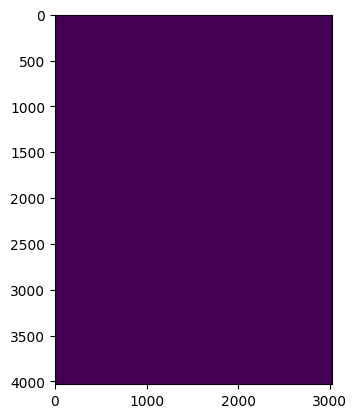

In [62]:
plt.imshow(bit_mask)

In [89]:
from shapely import Point, Polygon
import shapely.vectorized
import rasterio.features

In [64]:
mask_polygon = Polygon(mask_xy)

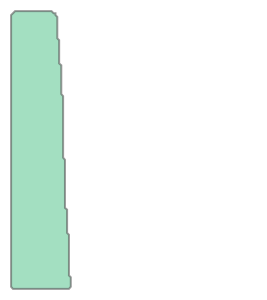

In [65]:
mask_polygon

In [69]:
list(mask_polygon.exterior.coords)

[(1896.0, 1058.0),
 (1890.0, 1065.0),
 (1890.0, 1953.0),
 (1903.0, 1966.0),
 (2022.0, 1966.0),
 (2029.0, 1959.0),
 (2035.0, 1959.0),
 (2035.0, 1953.0),
 (2041.0, 1947.0),
 (2041.0, 1877.0),
 (2047.0, 1871.0),
 (2047.0, 1795.0),
 (2054.0, 1789.0),
 (2054.0, 1695.0),
 (2060.0, 1688.0),
 (2060.0, 1487.0),
 (2066.0, 1480.0),
 (2066.0, 1323.0),
 (2073.0, 1317.0),
 (2073.0, 1241.0),
 (2079.0, 1235.0),
 (2079.0, 1102.0),
 (2085.0, 1096.0),
 (2085.0, 1065.0),
 (2079.0, 1058.0),
 (1896.0, 1058.0)]

In [83]:
im1.width

4032

In [91]:
mask_map = rasterio.features.rasterize([mask_polygon], out_shape=im1.size)


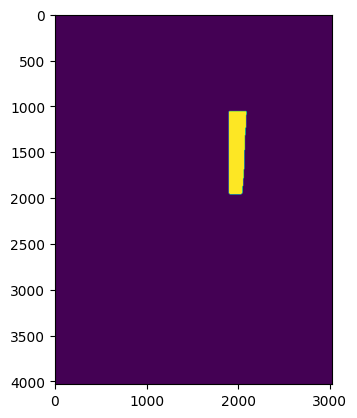

In [97]:
plt.imshow(mask_map)

In [77]:
len(bit_mask)

4032

In [78]:
bit_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [80]:
sum(sum(bit_mask))

0

TypeError: Invalid shape (4032,) for image data

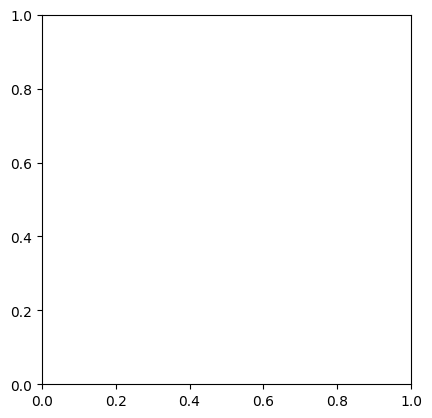

In [74]:
plt.imshow(polygon_bit_mask)